<a href="https://colab.research.google.com/github/krishnashahh/World-Happiness-Analysis/blob/main/World_Happiness_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving World_happiness.csv to World_happiness.csv


In [ ]:
df = pd.read_csv('World_happiness.csv' , encoding='ISO-8859-1' )  # change the file name as per your dataset
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [ ]:
# Clean column names for easier access
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

<ipython-input-18-77c3097db72c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_life_ladder.values, y=avg_life_ladder.index, palette='magma')


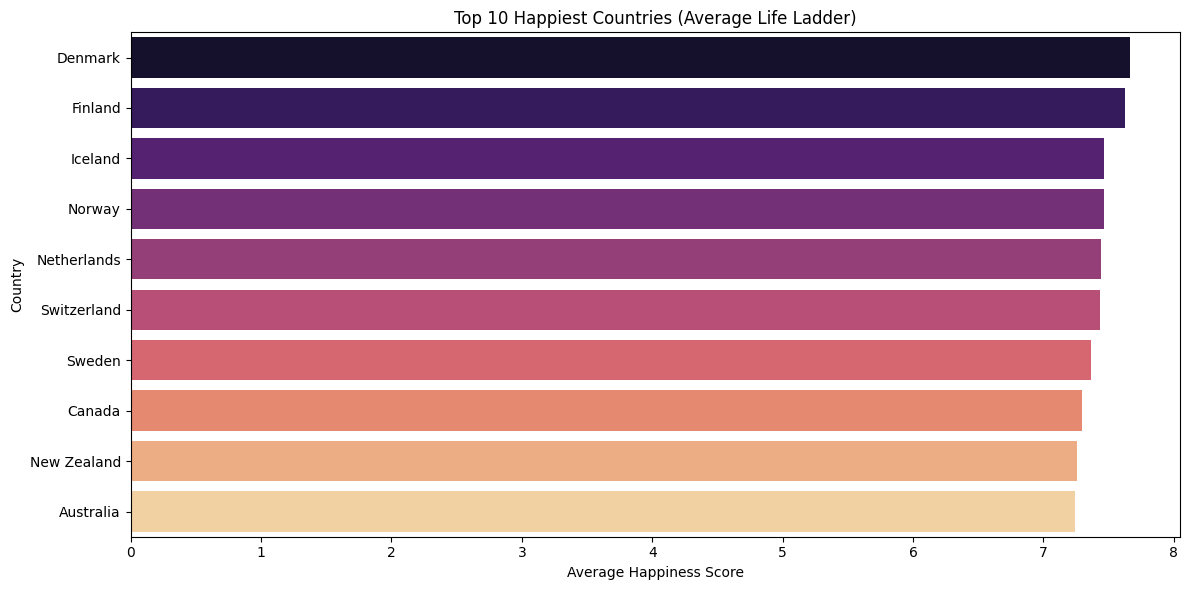

In [ ]:
# Calculate average happiness score per country
avg_life_ladder = df.groupby('country_name')['life_ladder'].mean().sort_values(ascending=False).head(10)

# Plot Top 10 happiest countries
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_life_ladder.values, y=avg_life_ladder.index, palette='magma')
plt.title('Top 10 Happiest Countries (Average Life Ladder)')
plt.xlabel('Average Happiness Score')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

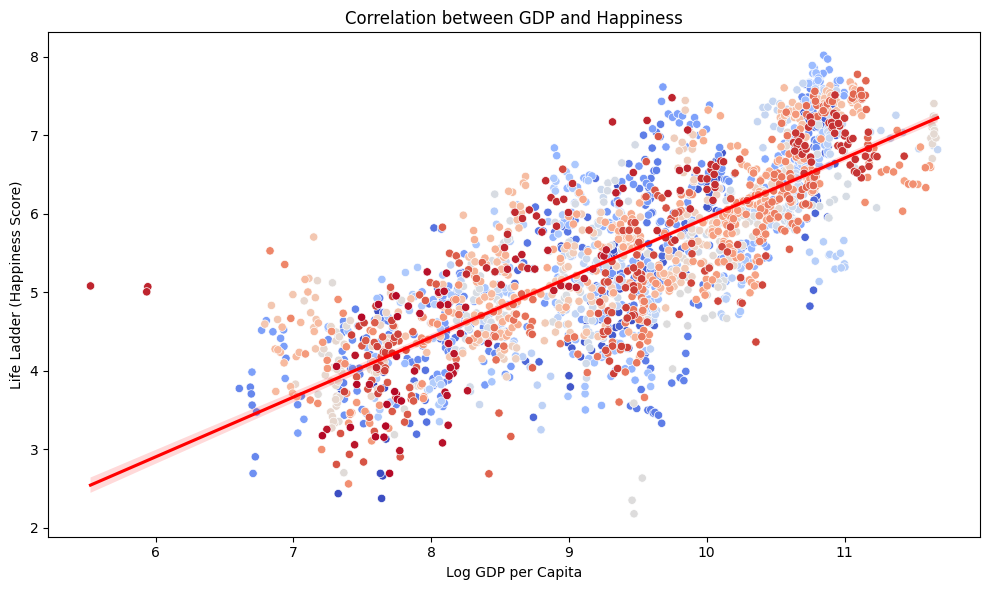

In [ ]:
# Scatter plot + regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='log_gdp_per_capita', y='life_ladder', hue='country_name', legend=False, palette='coolwarm')
sns.regplot(data=df, x='log_gdp_per_capita', y='life_ladder', scatter=False, color='red')
plt.title('Correlation between GDP and Happiness')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Life Ladder (Happiness Score)')
plt.tight_layout()
plt.show()

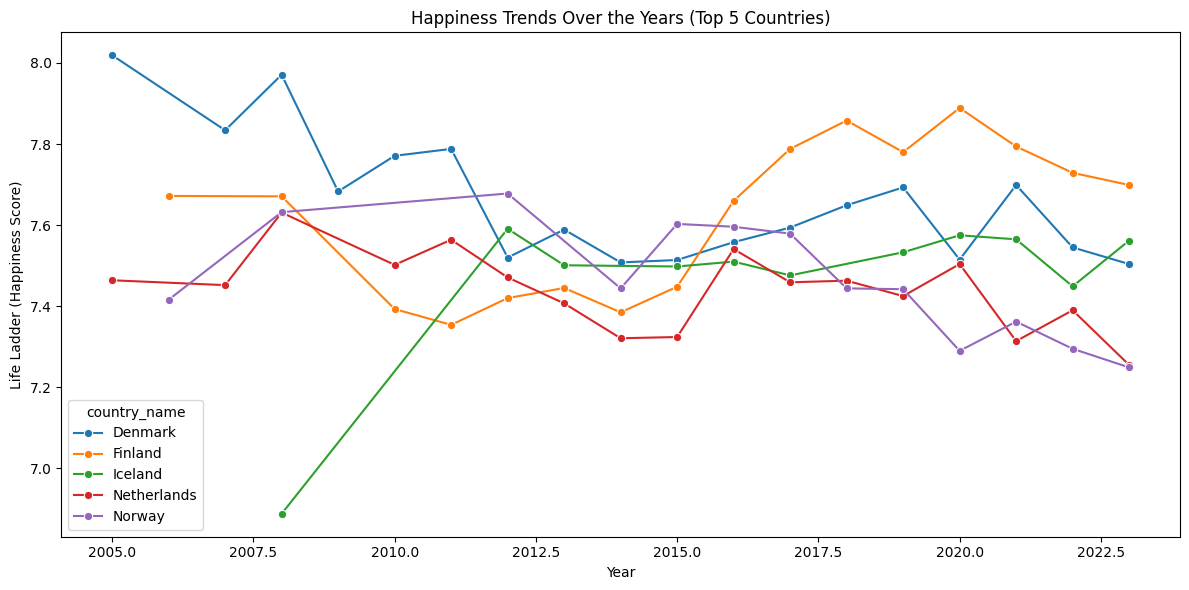

In [ ]:
# Get top 5 happiest countries by average score
top_5_countries = df.groupby('country_name')['life_ladder'].mean().sort_values(ascending=False).head(5).index

# Filter data for these countries
trend_data = df[df['country_name'].isin(top_5_countries)]

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_data, x='year', y='life_ladder', hue='country_name', marker='o')
plt.title('Happiness Trends Over the Years (Top 5 Countries)')
plt.xlabel('Year')
plt.ylabel('Life Ladder (Happiness Score)')
plt.tight_layout()
plt.show()